In [2]:
import numpy

def readfile(file):
    data = list()
    with open(file) as f:
        for l in f.readlines():
            if l.startswith(">"): continue
            if l.startswith("windowsize"): continue
            data.append((float(l)*10**6))
    return data

zeromq = readfile('data/latency/ping_zmq.txt')
netio = readfile('data/latency/ping_netio.txt')
netio_ib = readfile('data/latency/ping_netio_ib.txt')

print("Sizes: NetIO={} NetIO/IB={} ZeroMQ={}".format(len(netio), len(netio_ib), len(zeromq)))
size = min(len(zeromq), len(netio), len(netio_ib))
print("Min: {}".format(size))
zeromq, netio, netio_ib = zeromq[:size], netio[:size], netio_ib[:size]

Sizes: NetIO=1714658 NetIO/IB=1527299 ZeroMQ=1420659
Min: 1420659


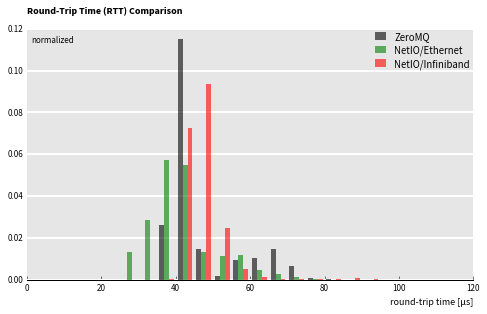

In [3]:
import matplotlib.pyplot as plt
import sys
import plotconfig
%matplotlib inline

plt.rcParams["font.family"] = "Source Sans Pro"
plt.rcParams["font.size"] = 9


fig = plt.figure(figsize=(8,4.5), frameon=False)

plt.hist([zeromq, netio, netio_ib], normed=True,
         label=["ZeroMQ", "NetIO/Ethernet", "NetIO/Infiniband"], bins=range(0, 120, 5), alpha=0.6,
        histtype='bar', log=False, lw=0, zorder=10, color=['black', 'green', 'red'])
plt.text(0.01, 0.975, "normalized", transform=plt.gca().transAxes, va='top', clip_on=True)
plt.ylabel("")
plt.title("Round-Trip Time (RTT) Comparison")
plt.xlabel(u"round-trip time [\u03BCs]")

#yticks=plt.gca().get_yticks().tolist()
#for i, y in enumerate(yticks):
#    if y>1000:
#        yticks[i] = "{}k".format(int(y)//1000)
#    else:
#        yticks[i] = "{}".format(int(y))
#plt.gca().set_yticklabels(yticks)

legend = plt.legend(loc='upper right', frameon=False,  ncol=1, 
           borderpad=0.3, labelspacing=0.3, handlelength=1, borderaxespad=0, columnspacing=1)

plotconfig.config_plot(plt.gca())
plt.savefig("NetIO-RTT.svg", bbox_inches='tight')


In [4]:
print("ZeroMQ\n-------------------------------")
print("Average: {}us\nMedian: {}us\nstd: {}".format(numpy.average(zeromq), numpy.median(zeromq), numpy.std(zeromq)))
print("\nNetIO/Eth\n-------------------------------")
print("Average: {}us\nMedian: {}us\nstd: {}".format(numpy.average(netio), numpy.median(netio), numpy.std(netio)))
print("\nNetIO/IB\n-------------------------------")
print("Average: {}us\nMedian: {}us\nstd: {}".format(numpy.average(netio_ib), numpy.median(netio_ib), numpy.std(netio_ib)))

ZeroMQ
-------------------------------
Average: 46.90069256591483us
Median: 42.0us
std: 116.29377038366735

NetIO/Eth
-------------------------------
Average: 41.31000683485622us
Median: 40.0us
std: 23.69847725695313

NetIO/IB
-------------------------------
Average: 47.40390339976025us
Median: 46.0us
std: 73.37041382447148
